# Pip Installs, Import Packages, + Load Data

-   Install and load packages

-   Load WomensSL + event data

In [1]:
%pip install tqdm statsbombpy -q

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install matplotlib

  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp313-cp313-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 8.1/8.1 MB 48.2 MB/s  0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 45.9 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 7.0/7.0 MB 52.7 MB/s  0:00:00

   ---------------------------------------- 0/7 [pyparsing]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 

In [4]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [52]:
%pip install sklearn-model

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 8.7/8.7 MB 49.4 MB/s  0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---------------- ----------------------- 16.0/38.5 MB 75.0 MB/s eta 0:00:01
   ------------------------------- -------- 29.9/38.5 MB 71.1 MB/s eta 0:00:01
   ---------------------------------------  38.3/38.5 MB 66.8 MB/s eta 0:00:01
   ---------------------------------------- 38.5/38.5 MB 58.0 MB/s  0:00:00
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   -------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# General Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsbombpy import sb

# Specific imports for this data
from typing import Optional, Iterable
from statsbombpy import sb
from tqdm.auto import tqdm
import math

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

c:\Users\Earni\OneDrive\Documents\GitHub\Throw-in-Project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
# Premier League 2016
PremierLeague = sb.matches(competition_id=2, season_id=27)

# Print cols + head
print(PremierLeague.columns)
PremierLeague.sort_values(by='match_week', ascending=True).head()

Index(['match_id', 'match_date', 'kick_off', 'competition', 'season',
       'home_team', 'away_team', 'home_score', 'away_score', 'match_status',
       'match_status_360', 'last_updated', 'last_updated_360', 'match_week',
       'competition_stage', 'stadium', 'referee', 'home_managers',
       'away_managers', 'data_version', 'shot_fidelity_version',
       'xy_fidelity_version'],
      dtype='object')


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
379,3754078,2015-08-08,18:30:00.000,England - Premier League,2015/2016,Chelsea,Swansea City,2,2,available,...,2021-06-13T16:17:31.694,1,Regular Season,Stamford Bridge,Michael Oliver,José Mario Felix dos Santos Mourinho,Garry Monk,1.1.0,2,2
378,3754128,2015-08-08,16:00:00.000,England - Premier League,2015/2016,AFC Bournemouth,Aston Villa,0,1,available,...,2021-06-13T16:17:31.694,1,Regular Season,Vitality Stadium,Mark Clattenburg,Eddie Howe,Tim Sherwood,1.1.0,2,2
377,3754141,2015-08-09,14:30:00.000,England - Premier League,2015/2016,Arsenal,West Ham United,0,2,available,...,2021-06-13T16:17:31.694,1,Regular Season,Emirates Stadium,Martin Atkinson,Arsène Wenger,Slaven Bilić,1.1.0,2,2
71,3754112,2015-08-09,14:30:00.000,England - Premier League,2015/2016,Newcastle United,Southampton,2,2,available,...,2021-06-13T16:17:31.694,1,Regular Season,St. James'' Park,Craig Pawson,Steve McClaren,Ronald Koeman,1.1.0,2,2
78,3754097,2015-08-08,13:45:00.000,England - Premier League,2015/2016,Manchester United,Tottenham Hotspur,1,0,available,...,2021-06-13T16:17:31.694,1,Regular Season,Old Trafford,Jonathan Moss,Louis van Gaal,Mauricio Roberto Pochettino Trossero,1.1.0,2,2


In [16]:
# Filter PremierLeague for Tottenham Hotspur as home or away team and show first 5 matches
club_name = 'Tottenham Hotspur'
TottenhamMatches = PremierLeague[(PremierLeague['home_team'] == club_name) | (PremierLeague['away_team'] == club_name)].copy()
print(f'Total Tottenham matches found: {len(TottenhamMatches)}')
TottenhamMatches = TottenhamMatches.sort_values(by='match_week', ascending=True).reset_index(drop=True)
TottenhamMatches.head(5)

Total Tottenham matches found: 38


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3754097,2015-08-08,13:45:00.000,England - Premier League,2015/2016,Manchester United,Tottenham Hotspur,1,0,available,scheduled,2020-08-25T03:18:59.434476,2021-06-13T16:17:31.694,1,Regular Season,Old Trafford,Jonathan Moss,Louis van Gaal,Mauricio Roberto Pochettino Trossero,1.1.0,2,2
1,3754270,2015-08-15,16:00:00.000,England - Premier League,2015/2016,Tottenham Hotspur,Stoke City,2,2,available,scheduled,2022-07-08T21:04:37.806798,2021-06-13T16:17:31.694,2,Regular Season,White Hart Lane,Robert Madley,Mauricio Roberto Pochettino Trossero,Mark Hughes,1.1.0,2,2
2,3753987,2015-08-22,16:00:00.000,England - Premier League,2015/2016,Leicester City,Tottenham Hotspur,1,1,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,3,Regular Season,King Power Stadium,Martin Atkinson,Claudio Ranieri,Mauricio Roberto Pochettino Trossero,1.1.0,2,2
3,3754268,2015-08-29,18:30:00.000,England - Premier League,2015/2016,Tottenham Hotspur,Everton,0,0,available,scheduled,2020-09-11T18:18:25.317407,2021-06-13T16:17:31.694,4,Regular Season,White Hart Lane,Mike Jones,Mauricio Roberto Pochettino Trossero,Roberto Martínez Montoliú,1.1.0,2,2
4,3754148,2015-09-13,14:30:00.000,England - Premier League,2015/2016,Sunderland,Tottenham Hotspur,0,1,available,scheduled,2020-10-01T07:40:32.450389,2021-06-13T16:17:31.694,5,Regular Season,Stadium of Light,Craig Pawson,Dick Advocaat,Mauricio Roberto Pochettino Trossero,1.1.0,2,2


In [25]:
# # 2020/2021 Women's Super League (Prem for females)
# WomenSL = sb.matches(competition_id=37, season_id=90)

# # Print cols + head
# print(WomenSL.columns)
# WomenSL.sort_values(by='match_week', ascending=True).head()

Index(['match_id', 'match_date', 'kick_off', 'competition', 'season',
       'home_team', 'away_team', 'home_score', 'away_score', 'match_status',
       'match_status_360', 'last_updated', 'last_updated_360', 'match_week',
       'competition_stage', 'stadium', 'referee', 'home_managers',
       'away_managers', 'data_version', 'shot_fidelity_version',
       'xy_fidelity_version'],
      dtype='object')


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
20,3764240,2020-09-06,15:00:00.000,England - FA Women's Super League,2020/2021,Bristol City WFC,Everton LFC,0,4,available,scheduled,2020-09-25T17:26:20.389793,2021-06-13T16:17:31.694,1,Regular Season,Twerton Park Stadium,Scott Jackson,Tanya Oxtoby,Willie Kirk,1.1.0,2,2
26,3764232,2020-09-06,15:30:00.000,England - FA Women's Super League,2020/2021,Manchester United,Chelsea FCW,1,1,available,scheduled,2022-08-15T23:41:02.644315,2021-06-13T16:17:31.694,1,Regular Season,Leigh Sports Village Stadium,Rebecca Welch,Casey Stoney,Emma Hayes,1.1.0,2,2
21,3764233,2020-09-06,13:30:00.000,England - FA Women's Super League,2020/2021,Arsenal WFC,Reading WFC,6,1,available,scheduled,2022-08-15T23:28:49.530360,2021-06-13T16:17:31.694,1,Regular Season,Meadow Park,Amy Fearn,Joseph Montemurro,Kelly Chambers,1.1.0,2,2
32,3764230,2020-09-06,15:00:00.000,England - FA Women's Super League,2020/2021,Tottenham Hotspur Women,West Ham United LFC,1,1,available,scheduled,2020-09-07T23:08:30.613690,2021-06-13T16:17:31.694,1,Regular Season,The Hive Stadium,Kirsty Dowle,Karen Hills,Matt Beard,1.1.0,2,2
37,3764231,2020-09-06,15:00:00.000,England - FA Women's Super League,2020/2021,Brighton & Hove Albion WFC,Birmingham City WFC,2,0,available,scheduled,2021-07-01T17:59:02.410,2021-06-13T16:17:31.694,1,Regular Season,Broadfield Stadium,Rob Whitton,Hope Patricia Powell,Carla Ward,1.1.0,2,2


In [9]:
# Black box copilot code 

# Load Event Data for Women's Super League

def build_events_dataset(
    matches_df: pd.DataFrame,
    match_id_col: str = "match_id",
    save_csv: Optional[str] = None,
    keep_columns: Optional[Iterable[str]] = None,
    add_meta: bool = True,
    ) -> pd.DataFrame:

# Fetch events for all match_ids in `matches_df`, concatenate into one DataFrame,
# and (optionally) merge key match metadata columns.

# Parameters
# ----------
# matches_df : DataFrame containing at least `match_id`
# match_id_col : name of the match id column
# save_parquet : path to save a Parquet file (recommended)
# save_csv : path to save a CSV file
# keep_columns : iterable of event columns to keep (None = keep all)
# add_meta : merge match metadata columns (season, teams, date, week, competition)

# Returns
# -------
# DataFrame of all events with `match_id` and optional metadata.

    if match_id_col not in matches_df.columns:
        raise KeyError(f"`{match_id_col}` not in matches_df columns")


    meta_cols = [
    match_id_col,
    "season", "season_id", "season_name",
    "competition", "competition_id", "competition_name",
    "match_date", "match_week",
    "home_team", "away_team"
    ]
    meta = matches_df[[c for c in meta_cols if c in matches_df.columns]].drop_duplicates()

    all_frames = []
    failures = []

    mids = pd.unique(matches_df[match_id_col].astype("int64"))
    for mid in tqdm(mids, desc="Fetching events"):
        try:
            ev = sb.events(match_id=int(mid))
            ev[match_id_col] = int(mid)
            all_frames.append(ev)
        except Exception as e:
            failures.append((int(mid), str(e)))

    if not all_frames:
        raise RuntimeError("No events were loaded. Check your match_ids or environment.")

    events = pd.concat(all_frames, ignore_index=True)


    if keep_columns is not None:
        keep = list(set(keep_columns) | {match_id_col})
        events = events[[c for c in keep if c in events.columns]]


    if add_meta and not meta.empty:
        events = events.merge(meta, on=match_id_col, how="left")


    if save_csv:
        events.to_csv(save_csv, index=False)
        print(f"Saved events: {len(events):,} rows → {save_csv}")

    if failures:
        print(f"\n Skipped {len(failures)} matches due to errors (showing first 5):")
    for mid, msg in failures[:5]:
        print(f" match_id={mid}: {msg}")

    return events


In [10]:
events_df = build_events_dataset(
PremierLeague,
keep_columns=None,
add_meta=True
)

Fetching events: 100%|██████████| 380/380 [04:37<00:00,  1.37it/s]


# Event Data Cleaning

-   Noticed quite a lot of dummy variables that make data hard to understand. Did some basic feature engineering for some columns and removed cols that I found not helpful for our usecase. Haven't fully worked through entire dataset because I moved onto selecting features we *need* rather than removing ones we don't. Maybe will come back to this.

-   Found the second match of the season on YouTube, helped me to understand what some of the features meant. Link: https://www.youtube.com/watch?v=APK4_kivx6o. Match_id = 3764234. Match starts at 42nd minute of the video. 

In [11]:
# Inspect Event Data Frame Head
pd.set_option('display.max_columns', None)
print(events_df.shape)

# Sort cols alphabetically
events_df = events_df[sorted(events_df.columns)]
events_df.head()

(1313783, 124)


,50_50,away_team,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_other,clearance_right_foot,competition,counterpress,dribble_no_touch,dribble_nutmeg,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_offensive,foul_committed_penalty,foul_committed_type,foul_won_advantage,foul_won_defensive,foul_won_penalty,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_lost_in_play,goalkeeper_lost_out,goalkeeper_outcome,goalkeeper_penalty_saved_to_post,goalkeeper_position,goalkeeper_punched_out,goalkeeper_saved_to_post,goalkeeper_shot_saved_off_target,goalkeeper_shot_saved_to_post,goalkeeper_success_in_play,goalkeeper_technique,goalkeeper_type,half_start_late_video_start,home_team,id,index,injury_stoppage_in_chain,interception_outcome,location,match_date,match_id,match_week,minute,miscontrol_aerial_won,off_camera,out,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_cut_back,pass_deflected,pass_end_location,pass_goal_assist,pass_height,pass_inswinging,pass_length,pass_miscommunication,pass_no_touch,pass_outcome,pass_outswinging,pass_recipient,pass_recipient_id,pass_shot_assist,pass_straight,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,player_off_permanent,position,possession,possession_team,possession_team_id,related_events,season,second,shot_aerial_won,shot_body_part,shot_deflected,shot_end_location,shot_first_time,shot_follows_dribble,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_open_goal,shot_outcome,shot_redirect,shot_saved_off_target,shot_saved_to_post,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,AFC Bournemouth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,England - Premier League,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leicester City,9153e9f4-f69c-4e04-8f64-505592e212cd,1,NaN,NaN,NaN,2016-01-02,3754058,20,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,NaN,1,Leicester City,22,NaN,2015/2016,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 442, 'lineup': [{'player': {'id'...",Leicester City,22,00:00:00.000,Starting XI,NaN
1,NaN,AFC Bournemouth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,England - Premier League,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leicester City,3fbcf4e7-94d1-485a-be85-fd26a6af0318,2,NaN,NaN,NaN,2016-01-02,3754058,20,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,NaN,1,Leicester City,22,NaN,2015/2016,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 4141, 'lineup': [{'player': {'id...",AFC Bournemouth,28,00:00:00.000,Starting XI,NaN
2,NaN,AFC Bournemouth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,England - Premier League,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leicester City,06a9a4dc-d9c9-40f6-bd89-437ba7fe682d,3,NaN,NaN,NaN,2016-01-02,3754058,20,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,NaN,1,Leicester City,22,[100362ee-9311-4187-bd8a-0201d9db2565],2015/2016,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFC B

## Basic Feature Engineering

In [12]:
# Feature Engineering

# Combine all clearance-related columns into one boolean column — indicates whether *any* clearance occurred
events_df['clearance'] = events_df[['clearance_aerial_won', 'clearance_body_part', 'clearance_head', 'clearance_left_foot', 'clearance_other']].any(axis=1)

# Combine all block-related columns into one boolean column — indicates whether *any* block occurred
events_df['block'] = events_df[['block_deflection', 'block_offensive', 'block_save_block']].any(axis=1)

# Combine goalkeeper type and outcome into a single descriptive column
events_df['goalkeeper_type_outcome'] = events_df['goalkeeper_type'].astype(str) + ' - ' + events_df['goalkeeper_outcome'].astype(str)

# Replace True with descriptive string for fouls committed with advantage
events_df['foul_committed_advantage'] = events_df['foul_committed_advantage'].replace(True, 'Committed Advantage')

# Replace True with descriptive string for offensive fouls committed
events_df['foul_committed_offensive'] = events_df['foul_committed_offensive'].replace(True, 'Committed Offensive')

# Replace True with descriptive string for penalty fouls committed
events_df['foul_committed_penalty'] = events_df['foul_committed_penalty'].replace(True, 'Committed Penalty')

# Replace True with descriptive string for fouls won with advantage
events_df['foul_won_advantage'] = events_df['foul_won_advantage'].replace(True, 'Won Advantage')

# Replace True with descriptive string for fouls won defensively
events_df['foul_won_defensive'] = events_df['foul_won_defensive'].replace(True, 'Won Defensive')

# Replace True with descriptive string for fouls won resulting in penalty
events_df['foul_won_penalty'] = events_df['foul_won_penalty'].replace(True, 'Won Penalty')

# Convert pass angle from radians to degrees and take absolute value since throws from right side are negative
events_df['pass_angle'] = np.abs(events_df['pass_angle'] * 180 / np.pi).round(3)

# Round pass length to 3 decimal places
events_df['pass_length'] = events_df['pass_length'].round(3)

# Round duration to 3 decimal places
events_df['duration'] = events_df['duration'].round(3)

# Remove events that are “Starting XI” or “Half Start”, since these aren’t real plays and don’t represent new possessions
events_df = events_df[~((events_df["type"] == "Starting XI") | (events_df["type"] == "Half Start"))]

# Convert timestamp to timedelta to calc differences
events_df["timestamp"] = pd.to_timedelta(events_df["timestamp"])

# Merge possession_time back into main df, will be repeated for every row in same possession but will make final df much easier to work with
events_df = events_df.merge(
    events_df.groupby(['match_id', 'possession'])['timestamp']
    .apply(lambda x: (x.max() - x.min()).total_seconds())
    .reset_index(name='possession_time'),
    on=['match_id', 'possession'],
    how='left'
)

# Useless columns for possession retention modeling
cols_to_remove = [
    # Match info – all values are useless
    'season', 'competition', 'match_date', 'match_week', 'home_team', 'away_team', 

    # Substitution specifics – irrelevant, whether or not a sub occurs captured in "type" col
    'substitution_replacement', 'substitution_replacement_id', 'substitution_outcome_id', 'substitution_outcome', 

    # Player info – the name or ID of player involved is irrelevant
    'player', 'player_id', 

    # Event ID – we already have match id and can sort chronologically
    'id', 
    'related_events', # long uninterpretable id for related events

    # Tactics / team formation – irrelevant
    'tactics', 

    # Off-camera – col is useless
    'off_camera', 

    # Clearance info – already made generic clearance col
    'clearance_aerial_won', 'clearance_body_part', 'clearance_head', 'clearance_left_foot', 'clearance_right_foot', 'clearance_other', 

    # Block info – already made generic block col
    'block_deflection', 'block_offensive', 'block_save_block', 

    # Goalkeeper info -  either useless or captured in goalkeeper outcome
    'goalkeeper_position', 'goalkeeper_end_location', 'goalkeeper_technique', 'goalkeeper_lost_out', 'goalkeeper_lost_in_play', 
    'goalkeeper_punched_out', 'goalkeeper_saved_to_post','goalkeeper_shot_saved_off_target', 'goalkeeper_shot_saved_to_post', 'goalkeeper_success_in_play',
    'goalkeeper_body_part', 'goalkeeper_type', 'goalkeeper_outcome',

    # Half start late video start, only happened 4 times nothing we can do
    'half_start_late_video_start'
    
]

# Remove columns
events_df_clean = events_df.drop(columns=cols_to_remove)

# Sort df alphabetically
events_df_clean = events_df_clean[sorted(events_df_clean.columns)]

# Sort by match_id then index
events_df_clean = events_df_clean.sort_values(by=['match_id', 'index']).reset_index(drop=True)

# Display cleaned df
pd.set_option('display.max_columns', None)
print(events_df_clean.shape)
events_df_clean.head(10)

(1311503, 89)


,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block,carry_end_location,clearance,counterpress,dribble_no_touch,dribble_nutmeg,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_offensive,foul_committed_penalty,foul_committed_type,foul_won_advantage,foul_won_defensive,foul_won_penalty,goalkeeper_penalty_saved_to_post,goalkeeper_type_outcome,index,injury_stoppage_in_chain,interception_outcome,location,match_id,minute,miscontrol_aerial_won,out,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_cut_back,pass_deflected,pass_end_location,pass_goal_assist,pass_height,pass_inswinging,pass_length,pass_miscommunication,pass_no_touch,pass_outcome,pass_outswinging,pass_recipient,pass_recipient_id,pass_shot_assist,pass_straight,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player_off_permanent,position,possession,possession_team,possession_team_id,possession_time,second,shot_aerial_won,shot_body_part,shot_deflected,shot_end_location,shot_first_time,shot_follows_dribble,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_open_goal,shot_outcome,shot_redirect,shot_saved_off_target,shot_saved_to_post,shot_statsbomb_xg,shot_technique,shot_type,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan - nan,5,NaN,NaN,"[61.0, 40.1]",3753972,0,NaN,NaN,NaN,143.130,NaN,Right Foot,NaN,NaN,NaN,"[60.2, 40.7]",NaN,Ground Pass,NaN,1.000,NaN,NaN,NaN,NaN,Jonjo Shelvey,3057.0,NaN,NaN,NaN,NaN,NaN,Kick Off,1,From Kick Off,NaN,Center Forward,2,Swansea City,26,25.774,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Swansea City,26,0 days 00:00:00.548000,Pass,NaN
1,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan - nan,6,NaN,NaN,"[60.2, 40.7]",3753972,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,From Kick Off,NaN,Center Attacking Midfield,2,Swansea City,26,25.774,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Swansea City,26,0 days 00:00:00.898000,Ball Receipt*,NaN
2,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan - nan,7,NaN,NaN,"[60.5, 42.1]",3753972,0,NaN,NaN,NaN,176.468,NaN,Left Foot,NaN,NaN,NaN,"[52.4, 41.6]",NaN,Ground Pass,NaN,8.115,NaN,NaN,NaN,NaN,Leon Britton,4631.0,NaN,NaN,NaN,NaN,NaN,NaN,1,From Kick Off,NaN,Center Attacking Midfield,2,Swansea City,26,25.774,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Swansea City,26,0 days 00:00:00.898000,Pass,NaN
3,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan - nan,8,NaN,NaN,"[64.3, 41.6]",3753972,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,From Kick Off,NaN,Center Forward,2,Swansea City,26,25.774,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFC Bournemouth,28,0 days 00:00:01.731000,Pressure,NaN
4,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan - nan,9,NaN,NaN,"[52.4, 41.6]",3753972,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,From Kick Off,NaN,Right Defensive Midfield,2,Swansea City,26,25.774,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Swansea City,26,0 days 00:00:01.808000,Ball Receipt*,True
5,NaN,NaN,NaN,NaN,NaN,False,"[53.1, 42.3]",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan - nan,10,NaN,NaN,"[52.4, 41.6]",3753972,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,From Kick Off,NaN,Right Defen

## Villa v City Subset

In [ ]:
# Only the first match of the season (Villa vs City), sorted by index (chronologically), and only plays related to throw-ins
ThrowsVillaVsCity = (events_df_clean[events_df_clean['match_id'] == 3764234]
                     .sort_values(by='index')
                     .query("pass_type == 'Throw-in'"))

# Selecting cols that I want displayed first
Imp_cols = [
    'index',
    'type',
    'pass_type',
    'pass_outcome',
    'possession_time',
    'location',
    'duration',   
    'timestamp',
    'minute',
    'second',
    'team',
    'pass_angle',
    'pass_end_location',
    'carry_end_location',
    'pass_length',
    'location',
    'goalkeeper_type_outcome'
]

# Display
ThrowsVillaVsCity[Imp_cols + [c for c in ThrowsVillaVsCity.columns if c not in Imp_cols]]

,index,type,pass_type,pass_outcome,possession_time,location,duration,timestamp,minute,second,team,pass_angle,pass_end_location,carry_end_location,pass_length,location,goalkeeper_type_outcome,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block,clearance,counterpress,dribble_no_touch,dribble_nutmeg,dribble_outcome,dribble_overrun,duel_outcome,duel_type,foul_committed_advantage,foul_committed_card,foul_committed_offensive,foul_committed_penalty,foul_committed_type,foul_won_advantage,foul_won_defensive,foul_won_penalty,injury_stoppage_in_chain,interception_outcome,match_id,miscontrol_aerial_won,out,pass_aerial_won,pass_assisted_shot_id,pass_body_part,pass_cross,pass_cut_back,pass_deflected,pass_goal_assist,pass_height,pass_inswinging,pass_miscommunication,pass_no_touch,pass_outswinging,pass_recipient,pass_recipient_id,pass_shot_assist,pass_straight,pass_switch,pass_technique,pass_through_ball,period,play_pattern,position,possession,possession_team,possession_team_id,shot_aerial_won,shot_body_part,shot_deflected,shot_end_location,shot_first_time,shot_follows_dribble,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_open_goal,shot_outcome,shot_redirect,shot_saved_off_target,shot_saved_to_post,shot_statsbomb_xg,shot_technique,shot_type,team_id,under_pressure
13651,26,Pass,Throw-in,NaN,13.494,"[67.9, 0.1]",1.802,0 days 00:00:39.711000,0,39,Manchester City WFC,149.259,"[45.2, 13.6]",NaN,26.411,"[67.9, 0.1]",nan - nan,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3764234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High Pass,NaN,NaN,NaN,NaN,Gemma Bonner,15554.0,NaN,NaN,NaN,NaN,NaN,1,From Throw In,Left Back,4,Manchester City WFC,746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,746,NaN
13781,156,Pass,Throw-in,NaN,78.750,"[51.0, 0.1]",1.679,0 days 00:02:52.567000,2,52,Manchester City WFC,134.566,"[37.9, 13.4]",NaN,18.668,"[51.0, 0.1]",nan - nan,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3764234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low Pass,NaN,NaN,NaN,NaN,Gemma Bonner,15554.0,NaN,NaN,NaN,NaN,NaN,1,From Throw In,Left Back,10,Manchester City WFC,746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,746,NaN
14052,427,Pass,Throw-in,NaN,7.714,"[70.2, 80.0]",1.325,0 days 00:08:49.345000,8,49,Manchester City WFC,41.548,"[86.9, 65.2]",NaN,22.314,"[70.2, 80.0]",nan - nan,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3764234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High Pass,NaN,NaN,NaN,NaN,Georgia Stanway,4643.0,NaN,NaN,NaN,NaN,NaN,1,From Throw In,Right Back,18,Manchester City WFC,746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,746,NaN
14235,610,Pass,Throw-in,Incomplete,6.107,"[109.8, 80.0]",2.003,0 days 00:13:35.789000,13,35,Manchester City WFC,119.571,"[99.7, 62.2]",NaN,20.466,"[109.8, 80.0]",nan - nan,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3764234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low Pass,NaN,NaN,NaN,NaN,Samantha June Mewis,5087.0,NaN,NaN,NaN,NaN,NaN,1,From Throw In,Right Wing,27,Manchester City WFC,746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,746,NaN
14245,620,Pass,Throw-in,NaN,16.770,"[71.1, 80.0]",0.946,0 days 00:13:52.865000,13,52,Manchester City WFC,41.186,"[78.3, 73.7]",NaN,9.567,"[71.1, 80.0]",nan - nan,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3764234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low Pass,NaN,NaN,NaN,NaN,Janine Elizabeth Beckie,4992.0,NaN,NaN,NaN,NaN,NaN,1,From Throw In,Right Back,28,Manchester City WFC,746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,746,NaN
14327,702,Pass,Throw-in,NaN,30.557,"[98.9, 80.0]",1.383,0 days 00:16:21.344000,16,21,Aston Villa,152.942,"[85.0, 72.9]",NaN,15.608,"[9

# Throws + Games Dataframes Creation
-   Overall goal is to capture xThrow and xRetain. xThrow is "did your throw go to a teammate yes or no", xRetain is "did you retain possession X amount of seconds after throw in" (original article chose arbitrary number of 7). Throws df will allow us to model both these things, Games df will help us decide if 7 seconds is actually a good baseline for xRetain

**Throws dataframe contains:**  

- `Duration (duration)` – how long it took to take the throw  
- `Location (location)` – where the throw was taken; standardized by team, x=0 is own goal, x=120 is opponent goal  
- `Angle (pass_angle)` – throw angle; throws are considered passes in this dataset  
- `Length (pass_length)` – length of the throw  
- `Outcome (pass_outcome)` – NaN is good, incomplete/out are bad; injury clearance and unknown removed, used for xT (expected throw)  
- `End_Location (pass_end_location)` – where the throw was received  
- `Height (pass_height)` – something *Game of Throw-Ins* didn’t really touch on; assuming higher throws → lower xRetain  
- `Possession_Time (possession_time)` – duration of the possession; will be used for xRetain  
- `Team (team)` – name of the team in possession 
- `Match (match_id)` – primary key for Games df  
- `Pass Distance (pass_length)` - distance of the pass

**Games dataframe contains:**  

- `Match` – primary key for the dataframe  
- `Team` – team name
- `Outcome` - outcome of game, will help us plot winners with other metrics
- `Total Throws` - total # of throws per match per team
- `#sec_Count` - number of throw-ins resulting in possession greater than # seconds
- `#sec_%` - % of throw-ins resulting in possesion greater than # seconds

In [55]:
# Throws df for xThrow
Throws = (
    events_df_clean.loc[events_df_clean['pass_type'] == 'Throw-in', ['duration', 'location', 'pass_angle', 'pass_length', 
                                                                     'pass_outcome', 'pass_end_location', 'pass_height', 
                                                                     'possession_time', 'team', 'match_id']]
    .rename(columns={
        'duration' : 'Duration',
        'location' : 'Location',
        'pass_angle' : 'Angle',
        'pass_length' : 'Length',
        'pass_outcome' : 'Outcome',
        'pass_end_location' : 'End_Location',
        'pass_height' : 'Height',
        'possession_time' : 'Possession_Time',
        'team' : 'Team',
        'match_id' : 'Match'
    })
    .reset_index(drop=True)
)

# Drop rows where throw_outcome is Injury Clearance or Unknown, we don't want these for xT and xRetain modeling
Throws = Throws[~Throws['Outcome'].isin(['Injury Clearance', 'Unknown'])].reset_index(drop=True)

# Feature engineering - Third will state whether the throw took place in defensive third, middle third, or attacking third
# Feature engineering - Third will state whether the throw took place in defensive third, middle third, or attacking third
def _location_to_third(loc):
    # Safely handle NaN, None, or non-indexable locations
    try:
        if loc is None:
            return None
        # Some rows store location as a list/tuple-like (x, y). Ensure it's indexable and has at least one element
        if isinstance(loc, (list, tuple)) and len(loc) >= 1 and pd.notnull(loc[0]):
            x = float(loc[0])
        else:
            # If it's a scalar numeric value (rare), try to convert directly
            if pd.notnull(loc) and (isinstance(loc, (int, float))):
                x = float(loc)
            else:
                return None
        if x <= 40:
            return "Defensive Third"
        elif x <= 80:
            return "Middle Third"
        else:
            return "Attacking Third"
    except Exception:
        return None

Throws["Third"] = Throws["Location"].apply(_location_to_third)

# Compute pass distance: prefer the provided 'Length' field when available, otherwise compute
# Euclidean distance between Location and End_Location if both are coordinate pairs
def _compute_pass_distance(row):
    # Use Length column if present and numeric
    if 'Length' in row and pd.notnull(row['Length']):
        try:
            return float(row['Length'])
        except Exception:
            pass
    loc = row.get('Location')
    end = row.get('End_Location')
    try:
        if isinstance(loc, (list, tuple)) and isinstance(end, (list, tuple)) and len(loc) >= 2 and len(end) >= 2:
            if pd.notnull(loc[0]) and pd.notnull(loc[1]) and pd.notnull(end[0]) and pd.notnull(end[1]):
                dx = float(end[0]) - float(loc[0])
                dy = float(end[1]) - float(loc[1])
                return float((dx*dx + dy*dy) ** 0.5)
    except Exception:
        return np.nan
    return np.nan

Throws['Pass_Distance'] = Throws.apply(_compute_pass_distance, axis=1)

# Wherever outcome isn't NaN, the possession time should be 0 but is actually tracking possession of other team
# (This line may be adjusted later after filling Outcome values)
Throws.loc[Throws['Outcome'].notna(), 'Possession_Time'] = 0.000

# Sort columns alphabetically
Throws = Throws[sorted(Throws.columns)]

Throws.head(15)

,Angle,Duration,End_Location,Height,Length,Location,Match,Outcome,Pass_Distance,Possession_Time,Team,Third
0,74.564,1.512,"[96.3, 13.5]",High Pass,13.901,"[92.6, 0.1]",3753972,NaN,13.901,17.401,AFC Bournemouth,Attacking Third
1,24.515,1.590,"[69.4, 8.4]",Low Pass,20.003,"[51.2, 0.1]",3753972,Incomplete,20.003,0.000,Swansea City,Middle Third
2,20.433,1.121,"[46.4, 74.3]",High Pass,16.327,"[31.1, 80.0]",3753972,NaN,16.327,2.318,AFC Bournemouth,Defensive Third
3,56.624,2.210,"[83.7, 21.2]",Low Pass,25.267,"[69.8, 0.1]",3753972,NaN,25.267,19.325,AFC Bournemouth,Middle Third
4,65.749,1.894,"[86.7, 59.8]",Low Pass,22.155,"[77.6, 80.0]",3753972,NaN,22.155,12.159,AFC Bournemouth,Middle Third
5,35.640,1.018,"[50.8, 7.7]",High Pass,13.043,"[40.2, 0.1]",3753972,NaN,13.043,1.931,AFC Bournemouth,Middle Third
6,28.571,1.013,"[52.5, 5.6]",Low Pass,11.500,"[42.4, 0.1]",3753972,NaN,11.500,6.796,AFC Bournemouth,Middle Third
7,53.366,1.023,"[69.3, 72.2]",Low Pass,9.720,"[63.5, 80.0]",3753972,NaN,9.720,43.468,Swansea City,Middle Third
8,59.574,0.886,"[50.3, 67.4]",Low Pass,14.612,"[42.9, 80.0]",3753972,NaN,14.612,9.651,AFC Bournemouth,Middle Third
9,74.745,0.853,"[105.7, 74.5]",Low Pass,5.701,"[104.2, 80.0]",3753972,Incomplete,5.701,0.000,Swansea City,Attacking Third


In [56]:
# Fill missing outcomes as 'Successful' (NaN indicates retention in original dataset)
Throws['Outcome'] = Throws['Outcome'].fillna('Successful')

# Create possession_outcome:
# - Successful & Possession_Time > 7 -> 'Successful/Retained'
# - Successful & Possession_Time < 7 -> 'Successful/Lost'
# - else -> 'Lost Throw-In'
conds = [
    (Throws['Outcome'] == 'Successful') & (Throws['Possession_Time'] > 7),
    (Throws['Outcome'] == 'Successful') & (Throws['Possession_Time'] < 7),
]
choices = ['Successful/Retained', 'Successful/Lost']
Throws['Possession_outcome'] = np.select(conds, choices, default='Lost Throw-In')

# Show sample
Throws.head(10)

,Angle,Duration,End_Location,Height,Length,Location,Match,Outcome,Pass_Distance,Possession_Time,Team,Third,Possession_outcome
0,74.564,1.512,"[96.3, 13.5]",High Pass,13.901,"[92.6, 0.1]",3753972,Successful,13.901,17.401,AFC Bournemouth,Attacking Third,Successful/Retained
1,24.515,1.590,"[69.4, 8.4]",Low Pass,20.003,"[51.2, 0.1]",3753972,Incomplete,20.003,0.000,Swansea City,Middle Third,Lost Throw-In
2,20.433,1.121,"[46.4, 74.3]",High Pass,16.327,"[31.1, 80.0]",3753972,Successful,16.327,2.318,AFC Bournemouth,Defensive Third,Successful/Lost
3,56.624,2.210,"[83.7, 21.2]",Low Pass,25.267,"[69.8, 0.1]",3753972,Successful,25.267,19.325,AFC Bournemouth,Middle Third,Successful/Retained
4,65.749,1.894,"[86.7, 59.8]",Low Pass,22.155,"[77.6, 80.0]",3753972,Successful,22.155,12.159,AFC Bournemouth,Middle Third,Successful/Retained
5,35.640,1.018,"[50.8, 7.7]",High Pass,13.043,"[40.2, 0.1]",3753972,Successful,13.043,1.931,AFC Bournemouth,Middle Third,Successful/Lost
6,28.571,1.013,"[52.5, 5.6]",Low Pass,11.500,"[42.4, 0.1]",3753972,Successful,11.500,6.796,AFC Bournemouth,Middle Third,Successful/Lost
7,53.366,1.023,"[69.3, 72.2]",Low Pass,9.720,"[63.5, 80.0]",3753972,Successful,9.720,43.468,Swansea City,Middle Third,Successful/Retained
8,59.574,0.886,"[50.3, 67.4]",Low Pass,14.612,"[42.9, 80.0]",3753972,Successful,14.612,9.651,AFC Bournemouth,Middle Third,Successful/Retained
9,74.745,0.853,"[105.7, 74.5]",Low Pass,5.701,"[104.2, 80.0]",3753972,Incomplete,5.701,0.000,Swansea City,Attacking Third,Lost Throw-In


In [ ]:
# Games = (
#     PremierLeague[['match_id', 'home_team', 'away_team', 'home_score', 'away_score']]
#     .sort_values(by='match_id',ascending=True)
#     .reset_index(drop=True)
# )

# # Create one col to determine outcome for home team: Win, Lose, or Draw
# Games['home_outcome'] = np.select(
#     (Games['home_score'] > Games['away_score'],Games['home_score'] < Games['away_score'],Games['home_score'] == Games['away_score']),
#     ('Win','Lose','Draw')
# )

# # Create one col to determine outcome for away team: Win, Lose, or Draw
# Games['away_outcome'] = np.select(
#     (Games['away_score'] > Games['home_score'],Games['away_score'] < Games['home_score'],Games['away_score'] == Games['home_score']),
#     ('Win','Lose','Draw')
# )

# # Home df
# home_df = Games[['match_id', 'home_team', 'home_outcome']].copy()
# home_df.rename(columns={'home_team': 'Team', 'home_outcome': 'Outcome', 'match_id': 'Match'}, inplace=True)

# # Away df
# away_df = Games[['match_id', 'away_team', 'away_outcome']].copy()
# away_df.rename(columns={'away_team': 'Team', 'away_outcome': 'Outcome', 'match_id': 'Match'}, inplace=True)

# # Combine both dataframes into new
# Games = pd.concat([home_df, away_df], ignore_index=True).sort_values(by=['Match', 'Team']).reset_index(drop=True)

# # Count number of throw-ins per game per team
# throw_counts = Throws.groupby(['Match', 'Team']).size().reset_index(name='Total_Throws')
# Games = Games.merge(throw_counts, on=['Match', 'Team'], how='left')

# # Loop to compute throw-ins lasting over 1 to 15 seconds
# for sec in range(1, 16):
#     col_count = f'{sec}sec_Count'
#     col_pct = f'{sec}sec_%'
    
#     stats = (
#         Throws.groupby(['Match', 'Team'])
#         .agg(
#             Throws_Count=('Angle', 'count'),
#             **{col_count: ('Possession_Time', lambda x, s=sec: (x > s).sum())}  # throws lasting > sec
#         )
#         .reset_index()
#     )
    
#     stats[col_pct] = (stats[col_count] / stats['Throws_Count'] * 100).round(3)
    
#     # Merge into Games dataframe
#     Games = Games.merge(stats[['Match', 'Team', col_count, col_pct]], on=['Match', 'Team'], how='left')

# c

## Games df for xRetain

In [28]:
Games = (
    PremierLeague[['match_id', 'home_team', 'away_team', 'home_score', 'away_score']]
    .sort_values(by='match_id',ascending=True)
    .reset_index(drop=True)
)
Games.head()

,match_id,home_team,away_team,home_score,away_score
0,3753972,Swansea City,AFC Bournemouth,2,2
1,3753973,Chelsea,West Ham United,2,2
2,3753974,Newcastle United,Everton,0,1
3,3753975,Sunderland,AFC Bournemouth,1,1
4,3753976,Arsenal,Swansea City,1,2


In [32]:
# Create one col to determine outcome for home team: Win, Lose, or Draw
Games['home_outcome'] = np.select(
    (Games['home_score'] > Games['away_score'],Games['home_score'] < Games['away_score'],Games['home_score'] == Games['away_score']),
    ('Win','Lose','Draw'),
    default='Other'
)

In [34]:
# Create one col to determine outcome for away team: Win, Lose, or Draw
Games['away_outcome'] = np.select(
    (Games['away_score'] > Games['home_score'],Games['away_score'] < Games['home_score'],Games['away_score'] == Games['home_score']),
    ('Win','Lose','Draw'),
    default='Other'
)

In [35]:
# Home df
home_df = Games[['match_id', 'home_team', 'home_outcome']].copy()
home_df.rename(columns={'home_team': 'Team', 'home_outcome': 'Outcome', 'match_id': 'Match'}, inplace=True)

# Away df
away_df = Games[['match_id', 'away_team', 'away_outcome']].copy()
away_df.rename(columns={'away_team': 'Team', 'away_outcome': 'Outcome', 'match_id': 'Match'}, inplace=True)

In [36]:
# Combine both dataframes into new
Games = pd.concat([home_df, away_df], ignore_index=True).sort_values(by=['Match', 'Team']).reset_index(drop=True)

In [37]:
# Count number of throw-ins per game per team
throw_counts = Throws.groupby(['Match', 'Team']).size().reset_index(name='Total_Throws')
Games = Games.merge(throw_counts, on=['Match', 'Team'], how='left')

In [ ]:
# Loop to compute throw-ins lasting over 1 to 15 seconds
for sec in range(1, 16):
    col_count = f'{sec}sec_Count'
    col_pct = f'{sec}sec_%'
    
    stats = (
        Throws.groupby(['Match', 'Team'])
        .agg(
            Throws_Count=('Angle', 'count'),
            **{col_count: ('Possession_Time', lambda x, s=sec: (x > s).sum())}  # throws lasting > sec
        )
        .reset_index()
    )
    
    stats[col_pct] = (stats[col_count] / stats['Throws_Count'] * 100).round(3)
    
    # Merge into Games dataframe
    Games = Games.merge(stats[['Match', 'Team', col_count, col_pct]], on=['Match', 'Team'], how='left')

In [39]:
Games.head(10)

,Match,Team,Outcome,Total_Throws,1sec_Count,1sec_%,2sec_Count,2sec_%,3sec_Count,3sec_%,4sec_Count,4sec_%,5sec_Count,5sec_%,6sec_Count,6sec_%,7sec_Count,7sec_%,8sec_Count,8sec_%,9sec_Count,9sec_%,10sec_Count,10sec_%,11sec_Count,11sec_%,12sec_Count,12sec_%,13sec_Count,13sec_%,14sec_Count,14sec_%,15sec_Count,15sec_%
0,3753972,AFC Bournemouth,Draw,25,24,96.000,23,92.000,22,88.000,22,88.000,22,88.000,21,84.000,20,80.000,19,76.000,17,68.000,16,64.000,15,60.000,13,52.000,11,44.000,10,40.000,10,40.000
1,3753972,Swansea City,Draw,25,18,72.000,18,72.000,17,68.000,16,64.000,14,56.000,13,52.000,12,48.000,11,44.000,11,44.000,11,44.000,11,44.000,11,44.000,10,40.000,10,40.000,8,32.000
2,3753973,Chelsea,Draw,20,14,70.000,14,70.000,13,65.000,11,55.000,11,55.000,11,55.000,11,55.000,10,50.000,10,50.000,8,40.000,8,40.000,8,40.000,8,40.000,8,40.000,8,40.000
3,3753973,West Ham United,Draw,8,4,50.000,4,50.000,4,50.000,4,50.000,3,37.500,3,37.500,3,37.500,3,37.500,1,12.500,1,12.500,1,12.500,1,12.500,1,12.500,1,12.500,1,12.500
4,3753974,Everton,Win,11,11,100.000,11,100.000,10,90.909,10,90.909,8,72.727,8,72.727,8,72.727,8,72.727,8,72.727,8,72.727,8,72.727,8,72.727,8,72.727,8,72.727,8,72.727
5,3753974,Newcastle United,Lose,15,13,86.667,12,80.000,11,73.333,9,60.000,9,60.000,9,60.000,8,53.333,8,53.333,8,53.333,7,46.667,7,46.667,7,46.667,7,46.667,7,46.667,7,46.667
6,3753975,AFC Bournemouth,Draw,28,27,96.429,26,92.857,26,92.857,26,92.857,25,89.286,23,82.143,23,82.143,23,82.143,23,82.143,22,78.571,22,78.571,22,78.571,22,78.571,21,75.000,20,71.429
7,3753975,Sunderland,Draw,23,20,86.957,20,86.957,19,82.609,19,82.609,17,73.913,17,73.913,16,69.565,15,65.217,15,65.217,15,65.217,12,52.174,12,52.174,12,52.174,9,39.130,8,34.783
8,3753976,Arsenal,Lose,22,22,100.000,22,100.000,22,100.000,20,90.909,20,90.909,18,81.818,18,81.818,18,81.818,18,81.818,18,81.818,17,77.273,16,72.727,16,72.727,15,68.182,15,68.182
9,3753976,Swansea City,Win,16,9,56.250,9,56.250,9,56.250,7,43.750,6,37.500,6,37.500,5,31.250,4,25.000,4,25.000,4,25.000,4,25.000,4,25.000,4,25.000,4,25.000,4,25.000


### Plotting for Games df

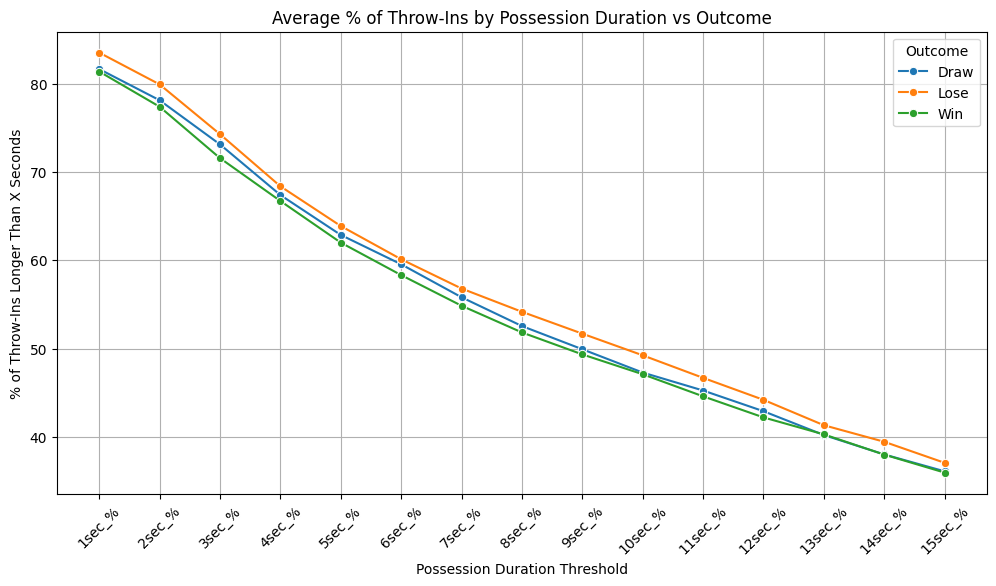

In [40]:
# Filter only the % columns
percent_cols = [f'{i}sec_%' for i in range(1, 16)]

# Aggregate by Outcome
agg_df = Games.groupby('Outcome')[percent_cols].mean().reset_index()

# Melt for plotting
plot_df = agg_df.melt(id_vars='Outcome', var_name='Seconds', value_name='Percentage')

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=plot_df, x='Seconds', y='Percentage', hue='Outcome', marker='o')
plt.xticks(rotation=45)
plt.title('Average % of Throw-Ins by Possession Duration vs Outcome')
plt.ylabel('% of Throw-Ins Longer Than X Seconds')
plt.xlabel('Possession Duration Threshold')
plt.grid(True)
plt.show()


## Random Forest Model

In [57]:
Throws.describe(include='all')

,Angle,Duration,End_Location,Height,Length,Location,Match,Outcome,Pass_Distance,Possession_Time,Team,Third,Possession_outcome
count,17357.000000,17357.000000,17357,17357,17357.000000,17357,1.735700e+04,17357,17357.000000,17357.000000,17357,17357,17357
unique,NaN,NaN,16834,2,NaN,2271,NaN,3,NaN,NaN,20,3,3
top,NaN,NaN,"[62.6, 12.4]",Low Pass,NaN,"[67.2, 80.0]",NaN,Successful,NaN,NaN,AFC Bournemouth,Middle Third,Successful/Retained
freq,NaN,NaN,3,10980,NaN,25,NaN,14316,NaN,NaN,1024,7108,9702
mean,75.864995,1.528968,NaN,NaN,18.357994,NaN,3.754162e+06,NaN,18.357994,23.018298,NaN,NaN,NaN
std,52.611579,0.752241,NaN,NaN,8.762022,NaN,1.101887e+02,NaN,8.762022,145.644030,NaN,NaN,NaN
min,0.000000,0.007000,NaN,NaN,0.000000,NaN,3.753972e+06,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,24.515000,1.002000,NaN,NaN,11.511000,NaN,3.754066e+06,NaN,11.511000,2.673000,NaN,NaN,NaN
50%,70.884000,1.403000,NaN,NaN,16.729000,NaN,3.754163e+06,NaN,16.729000,9.175000,NaN,NaN,NaN
75%,121.827000,1.852000,NaN,NaN,23.673000,NaN,3.754258e+06,NaN,23.673000,21.823000,NaN,NaN,NaN


In [53]:
from sklearn.model_selection import train_test_split

In [ ]:
y = Throws['Possession_outcome']
x = Throws.drop('Possession_outcome', axis=1)

x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=.3, random_state = 0)